# Atualização de pacote e importação de bibliotecas


In [ ]:
!pip -q install plotly --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 26.4 MB/s eta 0:00:00


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.naive_bayes import GaussianNB

# Padronização


x = (x - média(x)) / desvio padrão(x)


# Normalização


x = (x - min(x)) / (max(x) - min(x))

# Pré-processamento dos dados

## Base de dados de crédito


In [ ]:
base_credit.head()

In [ ]:
base_credit.describe()

In [ ]:
base_credit[base_credit['income'] >= 69995.685578]

### Visualização dos dados

In [ ]:
np.unique(base_credit['default'], return_counts = True)

In [ ]:
sns.countplot(x = base_credit['default']);

In [ ]:
plt.hist(x = base_credit['age']);

In [ ]:
plt.hist(x = base_credit['income']);

In [ ]:
plt.hist(x = base_credit['loan']);

In [ ]:
grafico = px.scatter_matrix(base_credit, dimensions = ['age', 'income', 'loan'], color = 'default');
grafico.show();

### Tratamento de valores inconsistentes

In [ ]:
# apagar a coluna inteira (recomendado para quando a maioria dos dados está inconsistente)
base_credit2 = base_credit.drop('age', axis = 1); # axis = 1 para coluna e 0 para linha
base_credit2


In [ ]:
# apagar somente os registros com valores inconsistentes
base_credit3 = base_credit.drop(base_credit[base_credit['age'] < 0].index)
base_credit3

In [ ]:
# preencher os valores inconsistentes manualmente (recomendado)

In [ ]:
# preencher os valores inconsistentes com a média
base_credit[base_credit['age'] > 0].mean()

clientid     1001.956935
income      45333.864334
age            40.927689
loan         4445.487716
default         0.141713
dtype: float64

In [ ]:
base_credit.loc[base_credit['age'] < 0, 'age'] = 40.92

In [ ]:
np.unique(base_credit['default'], return_counts = True)

(array([0, 1]), array([1717,  283]))

In [ ]:
base_credit.head(30)

### Tratamento de valores faltantes

In [ ]:
base_credit.isnull().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [ ]:
base_credit.loc[pd.isnull(base_credit['age'])]

,clientid,income,age,loan,default


In [ ]:
base_credit['age'].fillna(base_credit['age'].mean(), inplace = True)

### Divisão entre previsores e classe


In [ ]:
x_credit = base_credit.iloc[:, 1:4].values # x para previsores 

In [ ]:
y_credit = base_credit.iloc[:, 4].values # y para classe

### Escalonamento dos valores

In [ ]:
x_credit[:,0]

array([66155.92509508, 34415.15396582, 57317.17006303, ...,
       44311.44926231, 43756.05660491, 69436.57955155])

In [ ]:
x_credit[:, 0].min(), x_credit[:,1].min(), x_credit[:, 2].min() # pegando menor renda, menor idade e menor dívida 

(20014.4894700497, 18.055188510566897, 1.37762959325451)

In [ ]:
x_credit[:, 0].max(), x_credit[:,1].max(), x_credit[:, 2].max() # pegando maior renda, maior idade e maior dívida

(69995.6855783239, 63.971795841120205, 13766.0512393337)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_credit = StandardScaler()
x_credit = scaler_credit.fit_transform(x_credit)

In [ ]:
x_credit[:, 0].min(), x_credit[:,1].min(), x_credit[:, 2].min() # pegando menor renda, menor idade e menor dívida APÓS PADRONIZAÇÃO

(-1.7676158019964077, -1.7264145408889917, -1.4592791099462408)

In [ ]:
x_credit[:, 0].max(), x_credit[:,1].max(), x_credit[:, 2].max() # pegando maior renda, maior idade e maior dívida APÓS PADRONIZAÇÃO

(1.7220222385319197, 1.7393673928651967, 3.0616609141708273)

In [ ]:
x_credit[:,0]

array([ 1.45393393, -0.76217555,  0.83682073, ..., -0.07122592,
       -0.11000289,  1.682986  ])

## Base de dados do censo


### Exploração dos dados

In [ ]:
base_census = pd.read_csv('/content/census.csv')

In [ ]:
base_census.describe()

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
base_census[base_census['hour-per-week'] >= 99]

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
935,37,Private,176900,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,99,United-States,>50K
1172,25,Private,404616,Masters,14,Married-civ-spouse,Farming-fishing,Not-in-family,White,Male,0,0,99,United-States,>50K
1887,55,Self-emp-not-inc,184425,Some-college,10,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,99,United-States,>50K
3578,37,Self-emp-inc,382802,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Black,Male,0,0,99,United-States,>50K
4086,50,?,174964,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,99,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30992,40,Self-emp-inc,104235,Masters,14,Never-married,Other-service,Own-child,White,Male,0,0,99,United-States,<=50K
31681,43,Private,266324,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1902,99,United-States,>50K
31699,43,Self-emp-not-inc,163108,Some-college,10,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,99,United-States,<=50K
32469,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,?,<=50K


In [ ]:
base_census.isnull().sum()

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

### Visualização dos dados

In [ ]:
np.unique(base_census['income'], return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

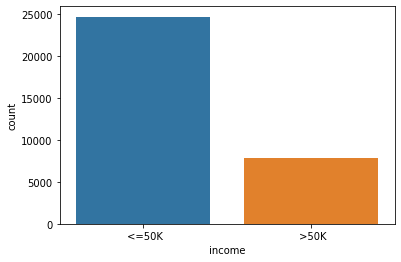

In [ ]:
sns.countplot(x = base_census['income']);

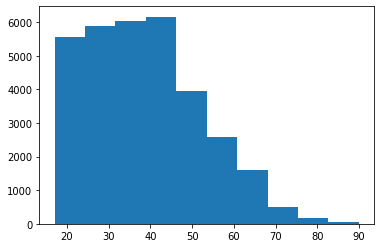

In [ ]:
plt.hist(x = base_census['age']);

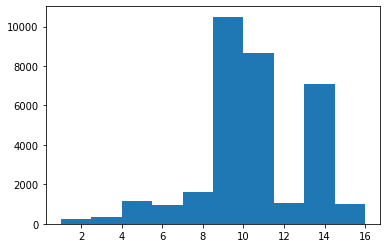

In [ ]:
plt.hist(x = base_census['education-num']);

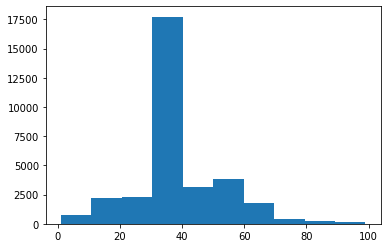

In [ ]:
plt.hist(x = base_census['hour-per-week']);

In [ ]:
grafico = px.treemap(base_census, path=['workclass', 'age'])
grafico.show();

In [ ]:
grafico2 = px.treemap(base_census, path=['occupation', 'relationship']);
grafico2.show()

In [ ]:
grafico3 = px.parallel_categories(base_census, dimensions=['occupation', 'relationship'])
grafico3.show()

In [ ]:
grafico4 = px.parallel_categories(base_census, dimensions=['workclass', 'occupation', 'income'])
grafico4.show()

In [ ]:
grafico5 = px.parallel_categories(base_census, dimensions=['education', 'income']);
grafico5.show();

### Divisão entre previsores e classe

In [ ]:
base_census.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country',
       'income'],
      dtype='object')

In [ ]:
x_census = base_census.iloc[:, 0:14].values # previsores
x_census[0]

array([39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40,
       ' United-States'], dtype=object)

In [ ]:
y_census = base_census.iloc[:, 14].values # classe
y_census[0]

' <=50K'

### Tratamento de atributos categóricos

#### LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_enconder_teste = LabelEncoder()

In [ ]:
x_census[:,1]

array([' State-gov', ' Self-emp-not-inc', ' Private', ..., ' Private',
       ' Private', ' Self-emp-inc'], dtype=object)

In [ ]:
teste = label_enconder_teste.fit_transform(x_census[:,1]) # entendo LabelEncoder
teste

array([7, 6, 4, ..., 4, 4, 5])

In [ ]:
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

In [ ]:
x_census[:,1] = label_encoder_workclass.fit_transform(x_census[:,1]);
x_census[:,3] = label_encoder_education.fit_transform(x_census[:,3]);
x_census[:,5] = label_encoder_marital.fit_transform(x_census[:,5]);
x_census[:,6] = label_encoder_occupation.fit_transform(x_census[:,6]);
x_census[:,7] = label_encoder_relationship.fit_transform(x_census[:,7]);
x_census[:,8] = label_encoder_race.fit_transform(x_census[:,8]);
x_census[:,9] = label_encoder_sex.fit_transform(x_census[:,9]);
x_census[:,13] = label_encoder_country.fit_transform(x_census[:,13]);

In [ ]:
x_census[0]

array([39, 7, 77516, 9, 13, 4, 1, 1, 4, 1, 2174, 0, 40, 39], dtype=object)

In [ ]:
x_census

array([[39, 7, 77516, ..., 0, 40, 39],
       [50, 6, 83311, ..., 0, 13, 39],
       [38, 4, 215646, ..., 0, 40, 39],
       ...,
       [58, 4, 151910, ..., 0, 40, 39],
       [22, 4, 201490, ..., 0, 20, 39],
       [52, 5, 287927, ..., 0, 40, 39]], dtype=object)

#### OneHotEncoder (maneira mais recomendada)

In [ ]:
# Carro

# Gol   Pálio   Uno
#   1     2       3

# Gol   1 0 0
#Pálio  0 1 0
# Uno   0 0 1

In [ ]:
len(np.unique(base_census['workclass']))

9

In [ ]:
len(np.unique(base_census['occupation']))

15

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
onehotencoder_census = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1, 3, 5, 6, 7, 8, 9, 13])], remainder='passthrough')

In [ ]:
x_census = onehotencoder_census.fit_transform(x_census).toarray()

In [ ]:
x_census[0]

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e

In [ ]:
x_census.shape

(32561, 108)

### Escalonamento dos valores

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_census = StandardScaler()
x_census = scaler_census.fit_transform(x_census)

In [ ]:
x_census[0]

array([-0.2444502 , -0.17429511, -0.26209736, -0.01466381, -1.5167923 ,
       -0.18838933, -0.29093568,  4.90769968, -0.02073999, -0.17175325,
       -0.19348662, -0.11609195, -0.07201601, -0.10164955, -0.1422718 ,
       -0.12664495, -0.18406376, -0.21053433,  2.25399324, -0.11334387,
       -0.68994199, -0.23637391, -0.03960742, -0.13419553, -0.53714425,
       -0.39750806, -0.02658695, -0.92284068, -0.11403678,  1.43105786,
       -0.1802846 , -0.17735813, -0.24494366,  2.76348874, -0.01662771,
       -0.37949517, -0.37774555, -0.17745022, -0.20957797, -0.25595432,
       -0.33554133, -0.06780164, -0.38166338, -0.14260848, -0.35531609,
       -0.17127887, -0.22710355, -0.82533335,  1.70899099, -0.17624972,
       -0.42934582, -0.34403232, -0.22492681, -0.09820087, -0.18155194,
       -0.32576824, -0.09161163,  0.4130197 , -0.70307135,  0.70307135,
       -0.13502327, -0.02416321, -0.06107342, -0.0480488 , -0.04260602,
       -0.05409379, -0.04641598, -0.02933708, -0.05714946, -0.05

## Divisão das bases em treinamento e teste

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_credit_treinamento, x_credit_teste, y_credit_treinamento, y_credit_teste = train_test_split(x_credit, y_credit, test_size = 0.25, random_state = 0)

In [ ]:
x_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [ ]:
x_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [ ]:
x_census_treinamento, x_census_teste, y_census_treinamento, y_census_teste = train_test_split(x_census, y_census, test_size = 0.15, random_state = 0)

In [ ]:
x_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [ ]:
x_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

## Salvar as variáveis

In [ ]:
import pickle

In [ ]:
with open('credit.pkl', mode = 'wb') as f:
  pickle.dump(
    [x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste], f
  )

In [ ]:
with open('census.pkl', mode = 'wb') as f:
  pickle.dump(
      [x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste], f
  )

# Naive Bayes

## Base de dados risco de crédito

In [ ]:
base_risco_credito = pd.read_csv('/content/risco_credito.csv')

In [ ]:
base_risco_credito

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo
5,desconhecida,baixa,adequada,acima_35,baixo
6,ruim,baixa,nenhuma,0_15,alto
7,ruim,baixa,adequada,acima_35,moderado
8,boa,baixa,nenhuma,acima_35,baixo
9,boa,alta,adequada,acima_35,baixo


In [ ]:
x_risco_credito = base_risco_credito.iloc[:,0:4].values # previsores
x_risco_credito

array([['ruim', 'alta', 'nenhuma', '0_15'],
       ['desconhecida', 'alta', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'adequada', 'acima_35'],
       ['ruim', 'baixa', 'nenhuma', '0_15'],
       ['ruim', 'baixa', 'adequada', 'acima_35'],
       ['boa', 'baixa', 'nenhuma', 'acima_35'],
       ['boa', 'alta', 'adequada', 'acima_35'],
       ['boa', 'alta', 'nenhuma', '0_15'],
       ['boa', 'alta', 'nenhuma', '15_35'],
       ['boa', 'alta', 'nenhuma', 'acima_35'],
       ['ruim', 'alta', 'nenhuma', '15_35']], dtype=object)

In [ ]:
y_risco_credito = base_risco_credito.iloc[:, 4].values # classe
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder_historia = LabelEncoder()
label_encoder_divida = LabelEncoder()
label_encoder_garantia = LabelEncoder()
label_encoder_renda = LabelEncoder()

In [ ]:
x_risco_credito[:,0] = label_encoder_historia.fit_transform(x_risco_credito[:,0])
x_risco_credito[:,1] = label_encoder_divida.fit_transform(x_risco_credito[:,1])
x_risco_credito[:,2] = label_encoder_garantia.fit_transform(x_risco_credito[:,2])
x_risco_credito[:,3] = label_encoder_renda.fit_transform(x_risco_credito[:,3])
x_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [ ]:
import pickle
with open('risco_credito.pkl', 'wb') as f:
  pickle.dump([x_risco_credito, y_risco_credito], f)

In [ ]:
naive_risco_credito = GaussianNB()
naive_risco_credito.fit(x_risco_credito, y_risco_credito)

GaussianNB()

In [ ]:
#historia boa(0), divida alta(0), garantias nenhuma(1), renda > 35(2)
#historia ruim(2), divida alta(0), garantias adequada(0), renda < 15(0)
previsao_risco_credito = naive_risco_credito.predict([[0,0,1,2], [2,0,0,0], [0,1,1,0]])

In [ ]:
previsao_risco_credito

array(['baixo', 'moderado', 'alto'], dtype='<U8')

In [ ]:
naive_risco_credito.class_count_

array([6., 5., 3.])

In [ ]:
naive_risco_credito.class_prior_

array([0.42857143, 0.35714286, 0.21428571])

## Base de dados de crédito - 93.8%

In [ ]:
with open('credit.pkl', 'rb') as f:
  x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
x_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [ ]:
x_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [ ]:
naive_credit_data = GaussianNB()
naive_credit_data.fit(x_credit_treinamento, y_credit_treinamento)

GaussianNB()

In [ ]:
previsao_credit_data = naive_credit_data.predict(x_credit_teste)

In [ ]:
previsao_credit_data #previsao 

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
y_credit_teste #dados reais

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
accuracy_score(y_credit_teste, previsao_credit_data) #comparando previsoes com dados reais

0.938

In [ ]:
confusion_matrix(y_credit_teste, previsao_credit_data)

array([[428,   8],
       [ 23,  41]])

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

0.938

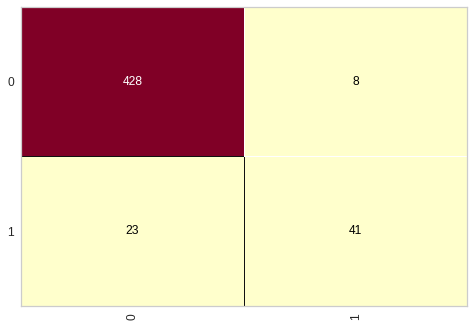

In [ ]:
cm = ConfusionMatrix(naive_credit_data)
cm.fit(x_credit_treinamento, y_credit_treinamento)
cm.score(x_credit_teste, y_credit_teste)

In [ ]:
print(classification_report(y_credit_teste, previsao_credit_data))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500



## Base de dados do censo - 47.67%

In [ ]:
with open('census.pkl', 'rb') as f:
  x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f)

In [ ]:
x_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [ ]:
x_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [ ]:
naive_census = GaussianNB()
naive_census.fit(x_census_treinamento, y_census_treinamento)
naive_census

GaussianNB()

In [ ]:
previsao_census = naive_census.predict(x_census_teste)
previsao_census

array([' >50K', ' >50K', ' >50K', ..., ' <=50K', ' >50K', ' >50K'],
      dtype='<U6')

In [ ]:
y_census_teste #dados reais

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [ ]:
accuracy_score(y_census_teste, previsao_census)

0.4767656090071648

0.4767656090071648

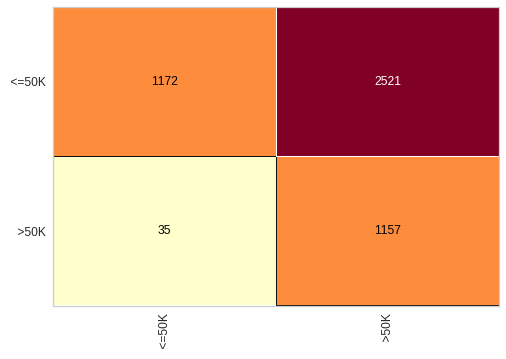

In [ ]:
cm = ConfusionMatrix(naive_census)
cm.fit(x_census_treinamento, y_census_treinamento)
cm.score(x_census_teste, y_census_teste)

In [ ]:
print(classification_report(y_census_teste, previsao_census))

              precision    recall  f1-score   support

       <=50K       0.97      0.32      0.48      3693
        >50K       0.31      0.97      0.48      1192

    accuracy                           0.48      4885
   macro avg       0.64      0.64      0.48      4885
weighted avg       0.81      0.48      0.48      4885



# Árvores de Decisão Simples

In [ ]:
from sklearn.tree import DecisionTreeClassifier

## Base de dados risco de crédito

In [ ]:
import pickle
with open('risco_credito.pkl', 'rb') as f:
  x_risco_credito, y_risco_credito = pickle.load(f)

In [ ]:
x_risco_credito, y_risco_credito

(array([[2, 0, 1, 0],
        [1, 0, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 2],
        [1, 1, 1, 2],
        [1, 1, 0, 2],
        [2, 1, 1, 0],
        [2, 1, 0, 2],
        [0, 1, 1, 2],
        [0, 0, 0, 2],
        [0, 0, 1, 0],
        [0, 0, 1, 1],
        [0, 0, 1, 2],
        [2, 0, 1, 1]], dtype=object),
 array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
        'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
       dtype=object))

In [ ]:
arvore_risco_credito = DecisionTreeClassifier(criterion="entropy")

In [ ]:
arvore_risco_credito.fit(x_risco_credito, y_risco_credito)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
arvore_risco_credito.feature_importances_

array([0.3362078 , 0.14179499, 0.03885431, 0.4831429 ])

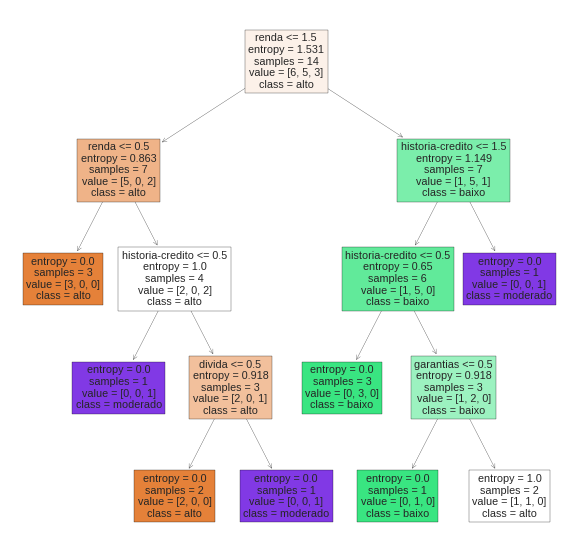

In [ ]:
from sklearn import tree
previsores = ['historia-credito', 'divida', 'garantias', 'renda']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
tree.plot_tree(arvore_risco_credito, feature_names = previsores, class_names=arvore_risco_credito.classes_, filled=True);

In [ ]:
#historia boa(0), divida alta(0), garantias nenhuma(1), renda > 35(2)
#historia ruim(2), divida alta(0), garantias adequada(0), renda < 15(0)
previsoes = arvore_risco_credito.predict([[0,0,1,2], [2,0,0,0]])
previsoes

array(['baixo', 'alto'], dtype=object)

## Base de dados de crédito - 98.2%

In [ ]:
with open('credit.pkl', 'rb') as f:
  x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
x_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [ ]:
x_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [ ]:
arvore_credit = DecisionTreeClassifier(criterion="entropy", random_state = 0)
arvore_credit.fit(x_credit_treinamento, y_credit_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
previsoes = arvore_credit.predict(x_credit_teste)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
accuracy_score(y_credit_teste, previsoes)

0.982

0.982

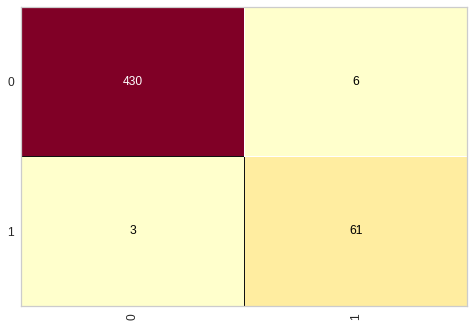

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_credit)
cm.fit(x_credit_treinamento, y_credit_treinamento)
cm.score(x_credit_teste, y_credit_teste)

In [ ]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.91      0.95      0.93        64

    accuracy                           0.98       500
   macro avg       0.95      0.97      0.96       500
weighted avg       0.98      0.98      0.98       500



In [ ]:
from sklearn import tree
previsores = ['income', 'age', 'loan']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(20,20))
tree.plot_tree(arvore_credit, feature_names = previsores, class_names=['0', '1'], filled=True);
figura.savefig('arvore_credit.png')

## Base de dados do censo - 81.04%

In [ ]:
with open('census.pkl', 'rb') as f:
  x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f)

In [ ]:
x_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [ ]:
x_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [ ]:
arvore_census = DecisionTreeClassifier(criterion='entropy')
arvore_census.fit(x_census_treinamento, y_census_treinamento)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
previsoes = arvore_census.predict(x_census_teste)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
accuracy_score(y_census_teste, previsoes)

0.8104401228249745

0.8104401228249745

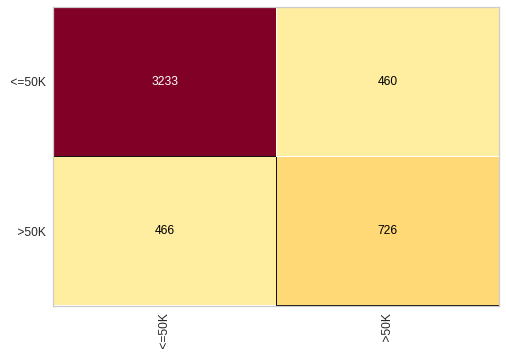

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_census)
cm.fit(x_census_treinamento, y_census_treinamento)
cm.score(x_census_teste, y_census_teste)

In [ ]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.87      0.88      0.87      3693
        >50K       0.61      0.61      0.61      1192

    accuracy                           0.81      4885
   macro avg       0.74      0.74      0.74      4885
weighted avg       0.81      0.81      0.81      4885



In [ ]:
from sklearn import tree
previsores = ['workclass', 'final-weight', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loos', 'hour-per-week', 'native-country']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(30,30))
tree.plot_tree(arvore_census, class_names=arvore_census.classes_, filled=True);
figura.savefig('arvore_census.png')

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

## Base de dados de crédito - 98.2% (100 árvores)

In [ ]:
import pickle
with open('credit.pkl', 'rb') as f:
  x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
x_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [ ]:
x_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [ ]:
random_forest_credit = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
random_forest_credit.fit(x_credit_treinamento, y_credit_treinamento)

RandomForestClassifier(criterion='entropy', random_state=0)

In [ ]:
previsoes = random_forest_credit.predict(x_credit_teste)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
accuracy_score(y_credit_teste, previsoes)

0.982

In [ ]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.95      0.91      0.93        64

    accuracy                           0.98       500
   macro avg       0.97      0.95      0.96       500
weighted avg       0.98      0.98      0.98       500



0.982

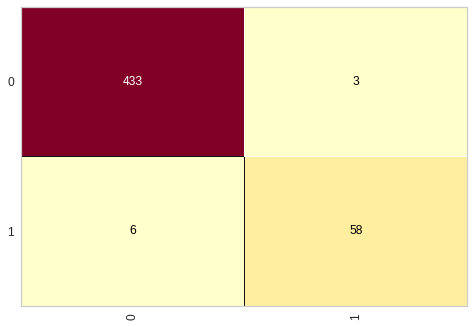

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(random_forest_credit)
cm.fit(x_credit_treinamento, y_credit_treinamento)
cm.score(x_credit_teste, y_credit_teste)

## Base de dados do censo - 85.07% (100 árvores)

In [ ]:
import pickle
with open('census.pkl', 'rb') as f:
  x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f)

In [ ]:
x_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [ ]:
x_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [ ]:
random_forest_census = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
random_forest_census.fit(x_census_treinamento, y_census_treinamento)

RandomForestClassifier(criterion='entropy', random_state=0)

In [ ]:
previsoes = random_forest_census.predict(x_census_teste)

In [ ]:
accuracy_score(y_census_teste, previsoes)

0.8507676560900717

In [ ]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      3693
        >50K       0.73      0.62      0.67      1192

    accuracy                           0.85      4885
   macro avg       0.81      0.77      0.79      4885
weighted avg       0.85      0.85      0.85      4885



0.8507676560900717

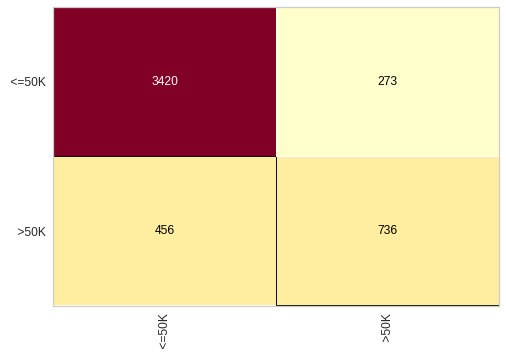

In [ ]:
cm = ConfusionMatrix(random_forest_census)
cm.fit(x_census_treinamento, y_census_treinamento)
cm.score(x_census_teste, y_census_teste)

# Regras

In [ ]:
!pip install Orange3

In [ ]:
import Orange

## Base de dados risco de crédito


In [ ]:
base_risco_credito = Orange.data.Table('/content/risco_credito_regras.csv')

In [ ]:
base_risco_credito.domain

[historia, divida, garantias, renda | risco]

In [ ]:
cn2 = Orange.classification.rules.CN2Learner()
regras_risco_credito = cn2(base_risco_credito)

In [ ]:
for regras in regras_risco_credito.rule_list:
  print(regras)

IF renda==0_15 THEN risco=alto 
IF historia==boa AND divida!=alta THEN risco=baixo 
IF historia==boa AND garantias!=nenhuma THEN risco=baixo 
IF historia==boa AND renda!=15_35 THEN risco=baixo 
IF historia==boa THEN risco=moderado 
IF divida==alta THEN risco=alto 
IF historia!=desconhecida THEN risco=moderado 
IF garantias==adequada THEN risco=baixo 
IF renda==15_35 THEN risco=moderado 
IF historia==desconhecida THEN risco=alto 
IF TRUE THEN risco=alto 


In [ ]:
#historia boa, divida alta, garantias nenhuma, renda > 35
#historia ruim, divida alta, garantias adequada, renda < 15
previsoes = regras_risco_credito([['boa', 'alta', 'nenhuma', 'acima_35'], ['ruim', 'alta', 'adequada', '0_15']])
previsoes

array([1, 0])

In [ ]:
base_risco_credito.domain.class_var #0=alto, 1=baixo, 2=moderado

DiscreteVariable(name='risco', values=('alto', 'baixo', 'moderado'))

In [ ]:
for i in previsoes:
  print(base_risco_credito.domain.class_var.values[i])

baixo
alto


## Base de dados de crédito - 97.2%

In [ ]:
base_credit = Orange.data.Table('/content/credit_data_regras.csv')

In [ ]:
base_credit.domain

[income, age, loan | default]

In [ ]:
base_credit_dividida = Orange.evaluation.testing.sample(base_credit, n = 0.25) #25% dos dados para teste
base_credit_dividida

([[41019.5, 23.2543, 3005.83 | 0],
  [54656.5, 18.3938, 9911.13 | 1],
  [37660.8, 53.7451, 2129.6 | 0],
  [38277.9, 44.9092, 7405.8 | 0],
  [49240.8, 53.2546, 8004.36 | 0],
  ...
 ], [[34332.3, 36.5014, 1225.72 | 0],
  [20346.5, 35.7161, 656.033 | 0],
  [61799.1, 56.958, 5619.22 | 0],
  [58978, 30.331, 9442.01 | 1],
  [60218.5, 32.4719, 3157.96 | 0],
  ...
 ])

In [ ]:
base_credit_treinamento = base_credit_dividida[1]
base_credit_teste = base_credit_dividida[0]
len(base_credit_treinamento), len(base_credit_teste)

(1500, 500)

In [ ]:
cn2 = Orange.classification.rules.CN2Learner()
regras_credit = cn2(base_credit_treinamento)

In [ ]:
for regras in regras_credit.rule_list:
  print(regras)

IF age>=34.9257164876908 THEN default=0 
IF loan<=2495.13299137587 AND income>=20145.9885970689 THEN default=0 
IF loan>=6978.52505744359 AND loan>=8034.74777409028 THEN default=1 
IF income>=57596.3540980592 AND age>=22.939635145478 THEN default=0 
IF income<=34667.0204005204 AND loan>=4265.17370408717 THEN default=1 
IF age>=34.5552007704973 THEN default=0 
IF income<=24857.6948815025 AND age>=23.238169600255798 THEN default=1 
IF income>=57787.565658800304 AND age>=22.918212262913602 THEN default=1 
IF income>=57787.565658800304 THEN default=0 
IF loan>=6043.14310633161 AND age>=26.854012909811 THEN default=1 
IF loan>=6289.25607587104 THEN default=1 
IF income>=50360.6787929311 THEN default=0 
IF loan>=5416.3577980789005 AND income>=50289.66474812481 THEN default=1 
IF loan>=5416.3577980789005 AND income>=49640.00470237809 THEN default=0 
IF loan>=5416.3577980789005 THEN default=1 
IF income>=32197.6207010448 AND income>=40496.2558229454 THEN default=0 
IF income>=32197.6207010448 

In [ ]:
previsoes = Orange.evaluation.testing.TestOnTestData(base_credit_treinamento, base_credit_teste, [lambda testdata: regras_credit])
previsoes

In [ ]:
Orange.evaluation.CA(previsoes), Orange.evaluation.F1(previsoes)

(array([0.972]), array([0.90410959]))

## Base de dados do censo - 82.49%

In [ ]:
base_census = Orange.data.Table('/content/census_regras.csv')
base_census.domain

[age, workclass, final-weight, education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loos, hour-per-week, native-country | income]

In [ ]:
base_census_dividida = Orange.evaluation.testing.sample(base_census, n = 0.25) #25% dos dados para teste
base_census

[[39, State-gov, 77516, Bachelors, 13, ... | <=50K],
 [50, Self-emp-not-inc, 83311, Bachelors, 13, ... | <=50K],
 [38, Private, 215646, HS-grad, 9, ... | <=50K],
 [53, Private, 234721, 11th, 7, ... | <=50K],
 [28, Private, 338409, Bachelors, 13, ... | <=50K],
 ...
]

In [ ]:
base_census_treinamento = base_census_dividida[1]
base_census_teste = base_census_dividida[0]
len(base_census_treinamento), len(base_census_teste)

(24421, 8140)

In [ ]:
cn2 = Orange.classification.rules.CN2Learner()
regras_census = cn2(base_census_treinamento)

In [ ]:
for regras in regras_census.rule_list:
  print(regras)

In [ ]:
previsoes = Orange.evaluation.testing.TestOnTestData(base_census_treinamento, base_census_teste, [lambda testdata: regras_census])
previsoes

In [ ]:
Orange.evaluation.CA(previsoes), Orange.evaluation.F1(previsoes)

(array([0.82493857]), array([0.62070801]))

# Classificador base - Majority Learner

## Base de dados de crédito - 85.85% 

In [ ]:
base_credit = Orange.data.Table('/content/credit_data_regras.csv')
base_credit.domain

[income, age, loan | default]

In [ ]:
majority = Orange.classification.MajorityLearner()

In [ ]:
previsoes = Orange.evaluation.testing.TestOnTestData(base_credit, base_credit, [majority])

In [ ]:
Orange.evaluation.CA(previsoes)
#ponto base para avaliação de algoritmos
#caso um algoritmo marque <85% podemos inferir que ele não é uma boa base

array([0.8585])

In [ ]:
from collections import Counter 
Counter(str(registro.get_class()) for registro in base_credit)

Counter({'0': 1717, '1': 283})

In [ ]:
1717 / (1717+283)

0.8585

## Base de dados do censo - 75.91%

In [ ]:
base_census = Orange.data.Table('/content/census_regras.csv')
base_census.domain

[age, workclass, final-weight, education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loos, hour-per-week, native-country | income]

In [ ]:
previsoes = Orange.evaluation.testing.TestOnTestData(base_census, base_census, [majority])

In [ ]:
Orange.evaluation.CA(previsoes)
#ponto base para avaliação de algoritmos
#caso um algoritmo marque <75% podemos inferir que ele não é uma boa base

array([0.75919044])

In [ ]:
from collections import Counter 
Counter(str(registro.get_class()) for registro in base_census)

Counter({'<=50K': 24720, '>50K': 7841})

In [ ]:
24720 / (24720+7841)

0.7591904425539756

# K-ésimo Vizinho mais Próximo (kNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

## Base de dados de crédito - 98.6% (k = 5)

In [ ]:
import pickle
with open('credit.pkl', 'rb') as f:
  x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
x_credit_treinamento.shape, y_credit_treinamento.shape, x_credit_teste.shape, y_credit_teste.shape

((1500, 3), (1500,), (500, 3), (500,))

In [ ]:
knn_credit = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2) #valores default
knn_credit.fit(x_credit_treinamento, y_credit_treinamento)

KNeighborsClassifier()

In [ ]:
previsoes = knn_credit.predict(x_credit_teste);

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_teste, previsoes) # padronização do arquivo base efetuada na aba pré processamento - base crédito - escalonamento dos valores 

0.986

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to Tr

0.986

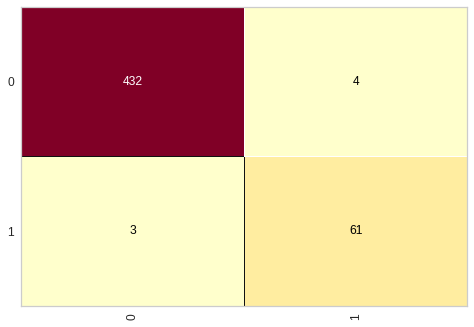

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(knn_credit);
cm.fit(x_credit_treinamento, y_credit_treinamento);
cm.score(x_credit_teste, y_credit_teste)

In [ ]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.94      0.95      0.95        64

    accuracy                           0.99       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.99      0.99      0.99       500



## Base de dados do censo - 82.23% (k = 5)

In [ ]:
import pickle
with open('census.pkl', 'rb') as f:
  x_censo_treinamento, y_censo_treinamento, x_censo_teste, y_censo_teste = pickle.load(f)

In [ ]:
x_censo_treinamento.shape, y_censo_treinamento.shape, x_censo_teste.shape, y_censo_teste.shape

((27676, 108), (27676,), (4885, 108), (4885,))

In [ ]:
knn_censo = KNeighborsClassifier(n_neighbors=5)
knn_censo.fit(x_censo_treinamento, y_censo_treinamento)

KNeighborsClassifier()

In [ ]:
previsoes = knn_censo.predict(x_censo_teste)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [ ]:
accuracy_score(y_censo_teste, previsoes) # padronização do arquivo base efetuada na aba pré processamento - base censo - escalonamento dos valores 

0.8223132036847492

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to Tr

0.8223132036847492

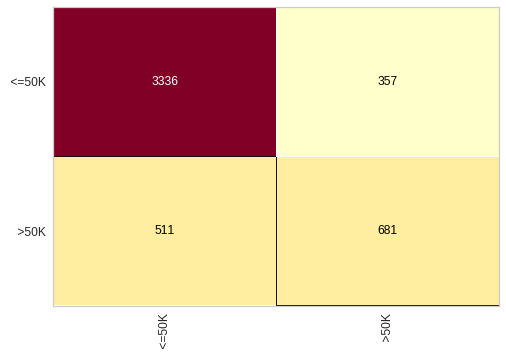

In [ ]:
cm = ConfusionMatrix(knn_censo);
cm.fit(x_censo_treinamento, y_censo_treinamento);
cm.score(x_censo_teste, y_censo_teste)

In [ ]:
print(classification_report(y_censo_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.87      0.90      0.88      3693
        >50K       0.66      0.57      0.61      1192

    accuracy                           0.82      4885
   macro avg       0.76      0.74      0.75      4885
weighted avg       0.82      0.82      0.82      4885



# Regressão Logística

In [7]:
from sklearn.linear_model import LogisticRegression

## Base de dados risco de crédito


In [2]:
import pickle
with open('risco_credito.pkl', 'rb') as f:
  x_risco_credito, y_risco_credito = pickle.load(f)

In [3]:
x_risco_credito.shape, y_risco_credito.shape

((14, 4), (14,))

In [5]:
x_risco_credito = np.delete(x_risco_credito, [2, 7, 11], axis=0) #apagando registros 'moderado' para melhor entendimento
y_risco_credito = np.delete(y_risco_credito, [2,7,11], axis=0)

In [6]:
x_risco_credito.shape, y_risco_credito.shape

((11, 4), (11,))

In [9]:
logistic_risco_credito = LogisticRegression(random_state = 1)
logistic_risco_credito.fit(x_risco_credito, y_risco_credito)

LogisticRegression(random_state=1)

In [10]:
logistic_risco_credito.intercept_#b0

array([-0.80828993])

In [11]:
logistic_risco_credito.coef_ #valor dos previsores

array([[-0.76704533,  0.23906678, -0.47976059,  1.12186218]])

In [12]:
#historia boa, divida alta, garantias nenhuma, renda > 35
#historia ruim, divida alta, garantias adequada, renda < 15
previsoes1 = logistic_risco_credito.predict([[0,0,1,2], [2,0,0,0]])
previsoes1

array(['baixo', 'alto'], dtype=object)

## Base de dados de crédito - 94.6%

In [13]:
with open('credit.pkl', 'rb') as f:
  x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [14]:
x_credit_treinamento.shape, y_credit_treinamento.shape, x_credit_teste.shape, y_credit_teste.shape

((1500, 3), (1500,), (500, 3), (500,))

In [15]:
logistic_credit = LogisticRegression(random_state = 1)
logistic_credit.fit(x_credit_treinamento, y_credit_treinamento)#criando parametro b0

LogisticRegression(random_state=1)

In [16]:
logistic_credit.intercept_, logistic_credit.coef_

(array([-6.02976095]), array([[-2.54927091, -3.72279861,  3.93940349]]))

In [17]:
previsoes = logistic_credit.predict(x_credit_teste)

In [19]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_teste, previsoes)

0.946

0.946

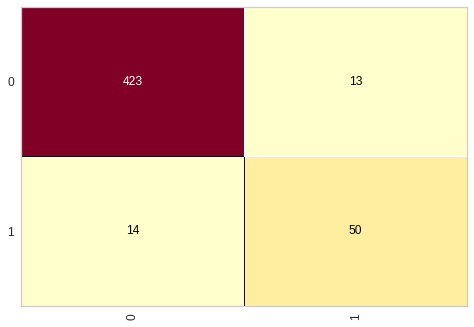

In [20]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(logistic_credit)
cm.fit(x_credit_treinamento, y_credit_treinamento)
cm.score(x_credit_teste, y_credit_teste)

In [21]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       436
           1       0.79      0.78      0.79        64

    accuracy                           0.95       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.95      0.95      0.95       500



## Base de dados do censo - 84.95%

In [22]:
with open('census.pkl', 'rb') as f:
  x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f)

In [23]:
x_census_treinamento.shape, y_census_treinamento.shape, x_census_teste.shape, y_census_teste.shape

((27676, 108), (27676,), (4885, 108), (4885,))

In [24]:
logistic_census = LogisticRegression(random_state = 1)
logistic_census.fit(x_census_treinamento, y_census_treinamento)

LogisticRegression(random_state=1)

In [26]:
previsoes = logistic_census.predict(x_census_teste)

In [27]:
accuracy_score(y_census_teste, previsoes)

0.849539406345957

0.849539406345957

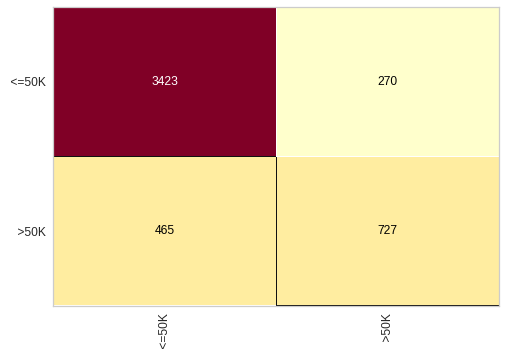

In [28]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(logistic_census)
cm.fit(x_census_treinamento, y_census_treinamento)
cm.score(x_census_teste, y_census_teste)

In [29]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      3693
        >50K       0.73      0.61      0.66      1192

    accuracy                           0.85      4885
   macro avg       0.80      0.77      0.78      4885
weighted avg       0.84      0.85      0.84      4885



# Máquinas de vetores de suporte (SVM)


In [8]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix

## Base de dados de crédito - 98.8% (kernel='rbf', C=6.0)

In [2]:
import pickle
with open('credit.pkl', 'rb') as f:
  x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [33]:
x_credit_treinamento.shape, y_credit_treinamento.shape, x_credit_teste.shape, y_credit_teste.shape

((1500, 3), (1500,), (500, 3), (500,))

In [109]:
svm_credit = SVC(kernel='rbf', random_state=1, C=6.0)
svm_credit.fit(x_credit_treinamento, y_credit_treinamento)

SVC(C=6.0, random_state=1)

In [110]:
previsoes = svm_credit.predict(x_credit_teste)

In [111]:
accuracy_score(y_credit_teste, previsoes)

0.988

0.988

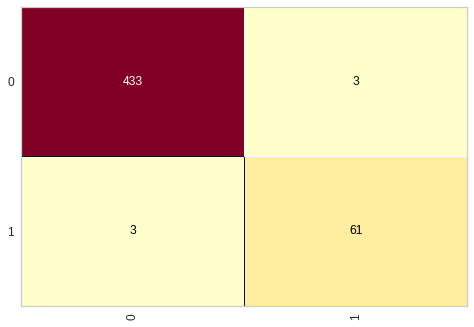

In [112]:
cm = ConfusionMatrix(svm_credit)
cm.fit(x_credit_treinamento, y_credit_treinamento)
cm.score(x_credit_teste, y_credit_teste)

In [113]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.95      0.95      0.95        64

    accuracy                           0.99       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.99      0.99      0.99       500



## Base de dados do censo - 85.11% (kernel='linear', C=6.0)


In [3]:
with open('census.pkl', 'rb') as f:
  x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f)

In [4]:
x_census_treinamento.shape, y_census_treinamento.shape, x_census_teste.shape, y_census_teste.shape

((27676, 108), (27676,), (4885, 108), (4885,))

In [17]:
svm_censo = SVC(kernel='linear', random_state=1, C=6.0)
svm_censo.fit(x_census_treinamento, y_census_treinamento)

SVC(C=6.0, kernel='linear', random_state=1)

In [18]:
previsoes = svm_censo.predict(x_census_teste)
accuracy_score(y_census_teste, previsoes)

0.8511770726714432

0.8511770726714432

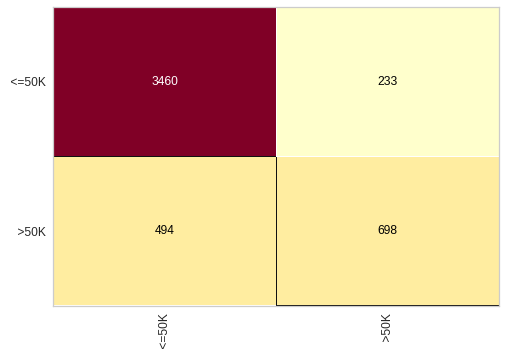

In [20]:
cm = ConfusionMatrix(svm_censo)
cm.fit(x_census_treinamento, y_census_treinamento)
cm.score(x_census_teste, y_census_teste)

In [21]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.90      3693
        >50K       0.75      0.59      0.66      1192

    accuracy                           0.85      4885
   macro avg       0.81      0.76      0.78      4885
weighted avg       0.84      0.85      0.84      4885

